In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

In [2]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

In [3]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


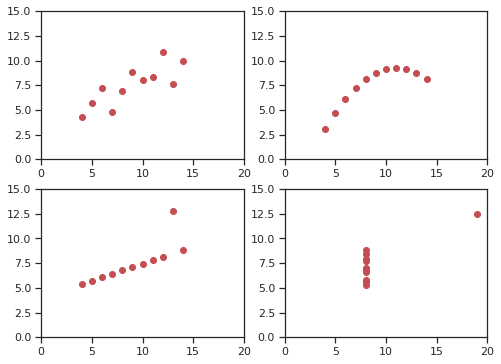

In [4]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
ax = ax.ravel()

for i,val in enumerate(df.dataset.unique()):
    
    x = df.loc[df.dataset == val, 'x']
    y = df.loc[df.dataset == val, 'y']
    
    ax[i].plot(x, y, 'ro')
    ax[i].set_xlim([0,20])
    ax[i].set_ylim([0,15])

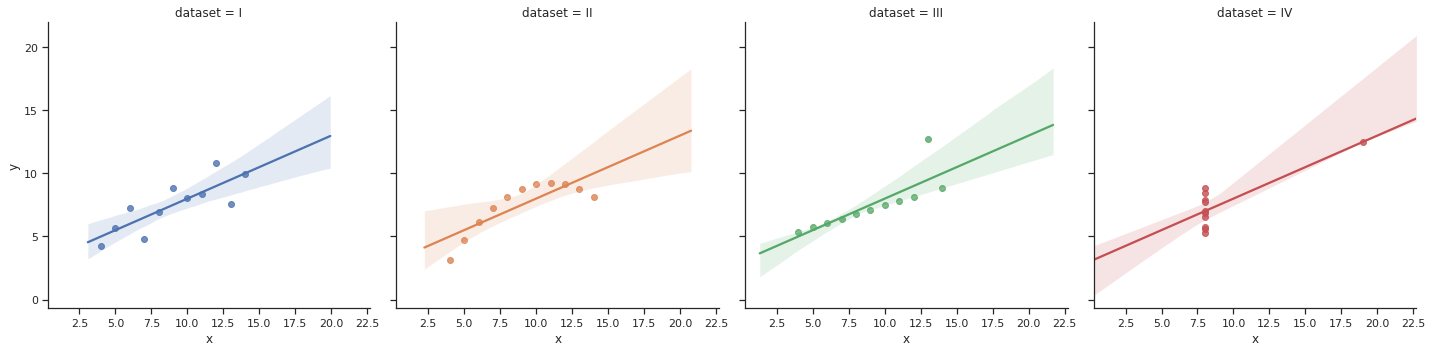

In [10]:
# Show the results of a linear regression within each dataset
sns.lmplot(data=df, x="x", y="y",
           col="dataset", hue="dataset");
#            col="dataset", hue="dataset");
# , 
#            col_wrap=2, ci=None, palette="muted", height=4,
#            scatter_kws={"s": 50, "alpha": 1})

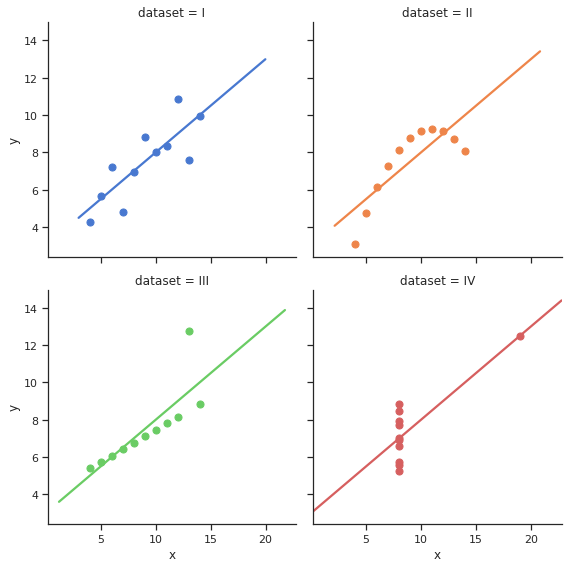

In [7]:
# Show the results of a linear regression within each dataset
sns.lmplot(data=df, x="x", y="y",
           col="dataset", hue="dataset",
           col_wrap=2, ci=None, 
           palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

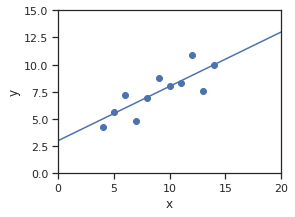

In [25]:
# the data we want to model, in column vector form
x = df.loc[df.dataset == 'I', 'x'].values.reshape(-1, 1)
y = df.loc[df.dataset == 'I', 'y'].values.reshape(-1, 1)

# modeling a best-fit line
model = LinearRegression()
model.fit(x, y)

# make new data for a line
x_new = np.linspace(0, 20, 100).reshape(-1, 1)
y_new = model.predict(x_new)

# plot the results
fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(x, y)
ax.plot(x_new, y_new)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([0,20])
ax.set_ylim([0,15])

plt.show()

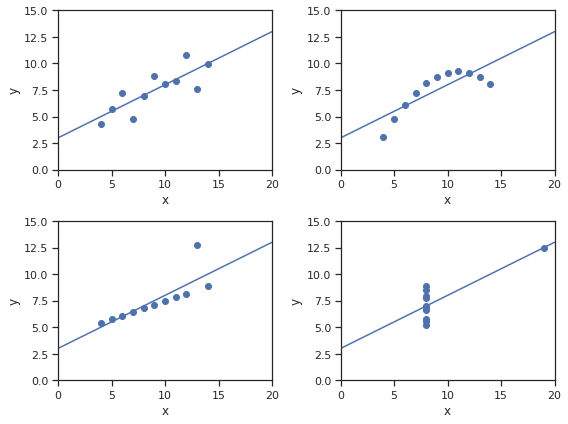

In [23]:
# fig, ax = plt.subplots(2,2,figsize=(8,6))
# ax = ax.ravel()

# for i,val in enumerate(df.dataset.unique()):
    
#     x = df.loc[df.dataset == val, 'x'].values.reshape(-1, 1)
#     y = df.loc[df.dataset == val, 'y'].values.reshape(-1, 1)
    
#     model = LinearRegression()
#     model.fit(x, y)
#     print(model.intercept_, model.coef_)
    
#     x_new = np.linspace(0, 20, 100).reshape(-1, 1)
#     y_new = model.predict(x_new)

#     ax[i].plot(x, y, 'ro')
#     ax[i].plot(x_new, y_new, 'k-')

#     ax[i].set_xlim([0,20])
#     ax[i].set_ylim([0,15])
# the data we want to model, in column vector form

fig, ax = plt.subplots(2,2,figsize=(8, 6))
ax = ax.ravel()

for i,val in enumerate(df.dataset.unique()):

    x = df.loc[df.dataset == val, 'x'].values.reshape(-1, 1)
    y = df.loc[df.dataset == val, 'y'].values.reshape(-1, 1)

    # modeling a best-fit line
    model = LinearRegression()
    model.fit(x, y)

    # make new data for a line
    x_new = np.linspace(0, 20, 100).reshape(-1, 1)
    y_new = model.predict(x_new)

    # plot the results
    ax[i].scatter(x, y)
    ax[i].plot(x_new, y_new)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_xlim([0,20])
    ax[i].set_ylim([0,15])

plt.tight_layout()
plt.show()

In [31]:
import ipywidgets
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
def findline(dataset='I'):
    
    fig, ax = plt.subplots(figsize=(5, 5))

    x = df.loc[df.dataset == dataset, 'x'].values.reshape(-1, 1)
    y = df.loc[df.dataset == dataset, 'y'].values.reshape(-1, 1)

    if dataset == 'IV':
        y[:] = 3 + 0.5*x[:]
        
    # modeling a best-fit line
    model = LinearRegression()
    model.fit(x, y)

    # make new data for a line
    x_new = np.linspace(0, 20, 100).reshape(-1, 1)
    y_new = model.predict(x_new)

    y_pred = model.predict(x)
    print('The coefficients of the line are: %.2f, %.2f' % (model.coef_, model.intercept_))
    print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))
    print('R^2: %.2f' % r2_score(y, y_pred))
    
    # plot the results
    ax.scatter(x, y)
    ax.plot(x_new, y_new)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim([0,20])
    ax.set_ylim([0,15])

ipywidgets.interactive(findline, dataset=df.dataset.unique())

interactive(children=(Dropdown(description='dataset', options=('I', 'II', 'III', 'IV'), value='I'), Output()),…

In [51]:
from IPython.display import clear_output
out = ipywidgets.Output()

def findline(dataset='I'):
    
    with out:
        clear_output(wait=True)
    
        #fig, ax = plt.subplots(figsize=(5, 5))

        x = df.loc[df.dataset == dataset, 'x'].values.reshape(-1, 1)
        y = df.loc[df.dataset == dataset, 'y'].values.reshape(-1, 1)

        if dataset == 'IV':
            y[:] = 3 + 0.5*x[:]

        # modeling a best-fit line
        model = LinearRegression()
        model.fit(x, y)

        # make new data for a line
        x_new = np.linspace(0, 20, 100).reshape(-1, 1)
        y_new = model.predict(x_new)

        y_pred = model.predict(x)
        print('The coefficients of the line are: %.2f, %.2f' % (model.coef_, model.intercept_))
        print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))
        print('R^2: %.2f' % r2_score(y, y_pred))

        # plot the results
    #     ax.scatter(x, y)
    #     ax.plot(x_new, y_new)
    #     ax.set_xlabel('x')
    #     ax.set_ylabel('y')

        x = sns.jointplot(data=df[df.dataset == dataset], x='x', y='y')
        ax = x.ax_joint
        ax.set_xlim([0,20])
        ax.set_ylim([0,15])

        ax.plot(x_new,y_new)
    
ipywidgets.interactive(findline, dataset=df.dataset.unique())

interactive(children=(Dropdown(description='dataset', options=('I', 'II', 'III', 'IV'), value='I'), Output()),…

In [52]:
import pandas as pd

In [53]:
dinodf = pd.read_csv('data/DatasaurusDozen.tsv',sep='\t')

In [54]:
dinodf

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


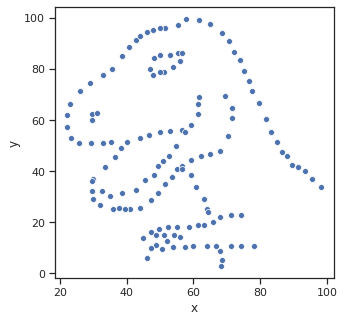

In [59]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=dinodf[dinodf.dataset=='dino'], x='x', y='y');

In [88]:
out = ipywidgets.Output()
def snsdino(dataset='dino'):

    with out:
        clear_output(wait=True)

        g = sns.jointplot(data=dinodf[dinodf.dataset==dataset], x='x', y='y', marginal_kws=dict(bins=15))
        x = dinodf.loc[dinodf.dataset==dataset,'x'].values
        y = dinodf.loc[dinodf.dataset==dataset,'y'].values
        xmean = x.mean()
        ymean = y.mean()
        xstd = x.std()
        ystd = y.std()
        corr = np.corrcoef(x,y)[0,1]
        msg = '''
        X Mean: {:.2f}
        Y Mean: {:.2f}
        X StdDev: {:.2f}
        Y StdDev: {:.2f}
        Corr: {:.2f}'''.format(xmean,ymean,xstd,ystd,corr)

        ax = g.ax_joint
        plt.text(1.0, 0.5, msg, fontsize=14, transform=plt.gcf().transFigure)

ipywidgets.interactive(snsdino, dataset = dinodf.dataset.unique())

interactive(children=(Dropdown(description='dataset', options=('dino', 'away', 'h_lines', 'v_lines', 'x_shape'…